# Image PreProcess

In [1]:
import cv2
import os
import glob
from PIL import Image
from cv2 import dnn_superres
Data_dir = "croped_images"
w_img = h_img = 198

In [9]:
files = glob.glob(os.path.join(Data_dir, "*.jpg"))

## Remove different shape Images

In [5]:
for i in files:
#     x = is_grey_scale(i)
    im = Image.open(i)
    im = im.resize((w_img, h_img))
    im = np.array(im)/255
    if len(im.shape)<3:
        print(i, 'is < 3')
        im.resize((w_img, h_img, 3))
        print(im.shape)
        os.remove(i)
        print('File Removed')
    elif im.shape[2] != 3:
        print(i, 'is', im.shape[2])
        im.resize((w_img, h_img, 3))
        print(im.shape)
        os.remove(i)
        print('File Removed')

UTKFac\16_0_0_20170110231517869.jpg is < 3
(198, 198, 3)
File Removed
UTKFac\16_0_0_20170110231918993.jpg is 4
(198, 198, 3)
File Removed
UTKFac\18_0_0_20170110231703804.jpg is < 3
(198, 198, 3)
File Removed
UTKFac\18_1_0_20170109214608184.jpg is < 3
(198, 198, 3)
File Removed
UTKFac\1_0_0_20170109193647852.jpg is < 3
(198, 198, 3)
File Removed
UTKFac\1_0_0_20170110212603790.jpg is 4
(198, 198, 3)
File Removed
UTKFac\1_0_0_20170110212658392.jpg is 4
(198, 198, 3)
File Removed
UTKFac\3_0_1_20170110213755346.jpg is < 3
(198, 198, 3)
File Removed
UTKFac\56_0_0_20170111202352043.jpg is 4
(198, 198, 3)
File Removed
UTKFac\56_1_0_20170110153005989.jpg is < 3
(198, 198, 3)
File Removed
UTKFac\58_0_1_20170111170138036.jpg is < 3
(198, 198, 3)
File Removed
UTKFac\65_0_0_20170111210851993.jpg is < 3
(198, 198, 3)
File Removed
UTKFac\70_0_0_20170111200757701.jpg is 4
(198, 198, 3)
File Removed
UTKFac\75_0_0_20170111210552235.jpg is < 3
(198, 198, 3)
File Removed
UTKFac\77_0_1_20170111211640428.jp

In [13]:
files = glob.glob(os.path.join(Data_dir, "*.jpg"))
fil = os.listdir(Data_dir)

## Filtering Images based on Age

In [14]:
# for j in fil:
#     if j.endswith(".jpg"):
#         print(j)

for filepath in files:
    path, filename = os.path.split(filepath)
    filename, ext = os.path.splitext(filename)
    print(filename)
    if filename.count('_')<3 or filename.count('_')>3:
        os.remove(filepath)
        continue
    age, gender, race, x = filename.split("_")
    print(path)
    print(age, gender, race)
    if int(age)<7 or int(age)>75:
        os.remove(filepath)

39_1_2_20170103182754641
croped_images
39 1 2
39_1_2_20170103183301786
croped_images
39 1 2
39_1_2_20170103183338179
croped_images
39 1 2
39_1_2_20170105001325620
croped_images
39 1 2
39_1_2_20170105170215020
croped_images
39 1 2
39_1_2_20170108225357064
croped_images
39 1 2
39_1_2_20170116164304221
croped_images
39 1 2
39_1_2_20170116192459890
croped_images
39 1 2
39_1_2_20170117154228051
croped_images
39 1 2
39_1_3_20170104214549390
croped_images
39 1 3
39_1_3_20170104220213820
croped_images
39 1 3
39_1_3_20170104223518221
croped_images
39 1 3
39_1_3_20170104232838176
croped_images
39 1 3
39_1_3_20170104233629347
croped_images
39 1 3
39_1_3_20170104234551137
croped_images
39 1 3
39_1_3_20170104234641563
croped_images
39 1 3
39_1_3_20170104235351986
croped_images
39 1 3
39_1_3_20170104235854833
croped_images
39 1 3
39_1_3_20170109140636847
croped_images
39 1 3
39_1_3_20170109141053796
croped_images
39 1 3
39_1_3_20170110173815028
croped_images
39 1 3
39_1_3_20170117141047098
croped_im

## Denoise Image

In [ ]:
for i in range(len(files)):
    denoise_img = cv2.imread(files[i])
    dst = cv2.fastNlMeansDenoisingColored(denoise_img,None,10,10,7,21)
    cv2.imwrite("croped_images/" + fil[i], dst)

In [15]:
files = glob.glob(os.path.join("croped_images/", "*.jpg"))
fil = os.listdir("croped_images/")

## Crop Faces from Images

In [16]:
print('Cropping Images')
for i in range(len(files)):
    img = cv2.imread(files[i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
        faces = img[y:y + h, x:x + w]
        cv2.imwrite("croped_images/" + fil[i], faces)

print('Cropping Done')

Cropping Images
Cropping Done


In [17]:
files = glob.glob(os.path.join("croped_images/", "*.jpg"))
fil = os.listdir("croped_images/")

## Image SuperResolution

In [4]:
## Not RUN
for i in range(len(files)):
    sr_image = cv2.imread(files[i])
#     print("Images done: ",files[i])
    sr = dnn_superres.DnnSuperResImpl_create()
    path = "ESPCN_x3.pb"
    sr.readModel(path)
#     sr.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
#     sr.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)
    sr.setModel("espcn", 3)
    result = sr.upsample(sr_image)
    cv2.imwrite("superres-images/" + fil[i], result)

Images done:  croped-images-2\100_0_0_20170112213500903.jpg
Images done:  croped-images-2\100_0_0_20170112215240346.jpg


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\dnn\src\net_impl.cpp:1188: error: (-2:Unspecified error) in function 'void __cdecl cv::dnn::dnn4_v20221220::Net::Impl::getLayerShapesRecursively(int,class std::map<int,struct cv::dnn::dnn4_v20221220::detail::LayerShapes,struct std::less<int>,class std::allocator<struct std::pair<int const ,struct cv::dnn::dnn4_v20221220::detail::LayerShapes> > > &)'
>  (expected: 'total(os[i]) > 0'), where
>     'total(os[i])' is -1271658496
> must be greater than
>     '0' is 0


In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
w_img = h_img = 198

def preprocess_image(img):
    # Load the image
#     img = image.load_img(img_path, color_mode="grayscale", target_size=(h_img, w_img))
    
    # Convert the image to numpy array
    
    img_array = image.img_to_array(img)
    
    # Normalize the image
    img_array = img_array / 255.0
    
    # Expand the dimensions of the image
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array

1/1 [==============================] - 0s 107ms/step


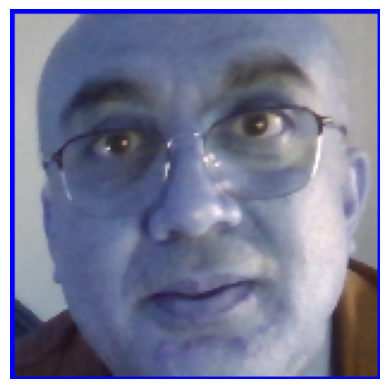

Age: 31
Race: Indian
Gender: Male


In [107]:
import cv2

face_cascade = cv2.CascadeClassifier('C:/Users/Tanny/anaconda3/Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)

img = 0
gray_img = 0

while True:
    # Read the frame from the camera
    _, img = cap.read()

    # Convert the frame to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

    # Draw a rectangle around each face
    for (x, y, w, h) in faces:
#         cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
#         img = cv2.imread("detected_face.jpg", img[y:y+h,x:x+w])
        img = img[y:y + h, x:x + w]
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Display the resulting frame
    cv2.imshow('Face detection', img)
#     img = gray_img
    # Exit if the 'q' key is pressed
    if cv2.waitKey(1) == ord('q'):
        break
#     cv2.waitKey(1)
# Load the model
model = load_model("model_1.h5")

resized_img = cv2.resize(gray_img, (h_img, w_img))

img_array = preprocess_image(resized_img)

# Make predictions
preds = model.predict(img_array)

# Extract predictions
age = preds[0][0][0]

race_labels = ['White', 'Black', 'Asian', 'Indian', 'Others']
race = race_labels[np.argmax(preds[1][0])]

gender_labels = ['Male', 'Female']
gender = gender_labels[np.argmax(preds[2][0])]

# Image Display
# img = mpimg.imread(img)
plt.imshow(img)
plt.axis('off')
plt.show()

# Print the age, race and gender
print("Age:", int(np.round(age*75)))
print("Race:", race)
print("Gender:", gender)

# Release the capture and destroy the window
cap.release()
cv2.destroyAllWindows()